# Análisis Exploratorio (EDA)  
En este notebook se realiza el análisis exploratorio con los datasets generados, para tener una visión  
mas amplia sobre las criptomonedas lo que permitirá establecer recomendaciones y conclusiones.

### Importar librerías

In [1]:
# importar librerías
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# cargar los datasets
df_datos_globales = pd.read_csv("datasets/df_datos_globales.csv")
df_precio_10_monedas = pd.read_csv("datasets/df_precio_10_monedas.csv")
df_historico_primeras4_monedas = pd.read_csv("datasets/df_historico_primeras4_monedas.csv")
df_olhc_btc = pd.read_csv("datasets/df_olhc_btc.csv")
df_olhc_ethereum = pd.read_csv("datasets/df_olhc_ethereum.csv")
df_olhc_tether = pd.read_csv("datasets/df_olhc_tether.csv")
df_olhc_binance = pd.read_csv("datasets/df_olhc_binance.csv")


### Datos Globales

In [3]:
# visualizar primeros registros
df_datos_globales.head(1)

,criptomonedas_activas,icos_activas,icos_finalizadas,mercados,fecha_actualizacion
0,10191,49,3376,837,1692936192


### Ejecutar Métodos para Exploración Preliminar
En esta sección se ejecutan métodos para una exploración preliminar, lo cual nos permitirá tener un  
conocimiento mas detallado del conjunto de datos.  
Para esto creo una función para aplicarla sobre el dataframe para esos métodos mas comunes  
que se utilizan para estos preliminares.

In [4]:
def print_df_info(df):
    
    print("** Info - Información general **")
    print(df.info())

    print("=======================================================")

    print("** Shape **")
    print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")

    print("=======================================================")

    print("** Describe - Estadísticas resumidas **")
    print(df.describe().T)

    print("=======================================================")

    print("** NaN - Nulos **")
    print(df.isna().sum())

    print("=======================================================")
    print("** Duplicated - Duplicados **")
    print(df.duplicated().sum())

In [5]:
print_df_info(df_datos_globales)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   criptomonedas_activas  67 non-null     int64
 1   icos_activas           67 non-null     int64
 2   icos_finalizadas       67 non-null     int64
 3   mercados               67 non-null     int64
 4   fecha_actualizacion    67 non-null     int64
dtypes: int64(5)
memory usage: 2.7 KB
None
** Shape **
Filas: 67 - Columnas: 5
** Describe - Estadísticas resumidas **
                       count          mean  std           min           25%  \
criptomonedas_activas   67.0  1.019100e+04  0.0  1.019100e+04  1.019100e+04   
icos_activas            67.0  4.900000e+01  0.0  4.900000e+01  4.900000e+01   
icos_finalizadas        67.0  3.376000e+03  0.0  3.376000e+03  3.376000e+03   
mercados                67.0  8.370000e+02  0.0  8.370000e+02  8.370000e+02   
f

In [6]:
# función para convertir la fecha
fecha = df_datos_globales["fecha_actualizacion"].iloc[0]

# Crear una función que convierte un timestamp a una fecha y hora
def date_unix_to_date_normal(ts):
    date_n = dt.datetime.fromtimestamp(ts)
    return date_n.strftime("%Y-%m-%d %H:%M:%S")

fecha = date_unix_to_date_normal(fecha)
fecha

'2023-08-25 00:03:12'

### Ver Algunos Datos Relevantes Globales  
Como son datos globales, se imprimen cuantas monedas hay activas, número de ofertas iniciales de monedas(ICO) que están en curso en el momento de la consulta, número de ofertas iniciales de monedas que han finalizado su período de recaudación de fondos, número de mercados activos o plataformas donde se pueden comprar y vender criptomonedas, y la fecha de la consulta.


In [7]:
cripto_activas = df_datos_globales["criptomonedas_activas"].iloc[0]
icos_activos = df_datos_globales["icos_activas"].iloc[0]
icos_finalizados = df_datos_globales["icos_finalizadas"].iloc[0]
mercados_activos = df_datos_globales["mercados"].iloc[0]

print(f"Número de criptomonedas activas actualmente: {cripto_activas}")
print(f"Número de ofertas iniciales de monedas que están en curso: {icos_activos}")
print(f"número de ofertas iniciales de monedas que han finalizado: {icos_finalizados}")
print(f"Número de mercados o exchanges donde se pueden comprar y vender: {mercados_activos}")
print(f"Datos actualizados a la fecha: {fecha}")

Número de criptomonedas activas actualmente: 10191
Número de ofertas iniciales de monedas que están en curso: 49
número de ofertas iniciales de monedas que han finalizado: 3376
Número de mercados o exchanges donde se pueden comprar y vender: 837
Datos actualizados a la fecha: 2023-08-25 00:03:12


- El número de criptomonedas activas actualmente es de **10191**, lo que significa que hay una gran variedad y diversidad de opciones para los inversores y usuarios de este tipo de activos digitales.  
- El número de ofertas iniciales de monedas (ICO) que están en curso es de **49**, lo que indica que hay un interés creciente por parte de los emprendedores y desarrolladores de lanzar nuevos proyectos basados en la tecnología blockchain.   
- El número de ofertas iniciales de monedas que han finalizado es de **3,376**, lo que muestra que hay una gran cantidad de proyectos que han logrado completar su fase de recaudación de fondos y pasar a la siguiente etapa de desarrollo o implementación.   
- El número de mercados o exchanges donde se pueden comprar y vender criptomonedas es de **837**, lo que refleja que hay una amplia oferta y demanda de este tipo de activos en el mundo.  

In [8]:
# ejecutar para liberar memoria
del df_datos_globales

### Comienzo del datasets df_precio_10_monedas  
Este dataset contiene la información de de las 10 primeras monedas según el ranking de CoinGecko

In [9]:
# Visualizar primeros datos
df_precio_10_monedas.head()

,nombre,dolar,dolar_mercado_cap,dolar_24h_vol,dolar_24h_cambio,euro,euro_mercado_cap,euro_24h_vol,euro_24h_cambio,ultima_actualizacion
0,binancecoin,216.900000,3.337946e+10,4.052273e+08,-0.171391,201.200000,3.096272e+10,3.758881e+08,0.606150,1.692936e+09
1,bitcoin,26089.000000,5.079679e+11,1.196168e+10,-1.253395,24200.000000,4.711900e+11,1.109563e+10,-0.484281,1.692936e+09
2,cardano,0.263153,9.219379e+09,2.090162e+08,-2.051790,0.244100,8.551877e+09,1.938830e+08,-1.288895,1.692936e+09
3,dogecoin,0.062408,8.782669e+09,2.363949e+08,-2.283106,0.057889,8.146786e+09,2.192794e+08,-1.522012,1.692936e+09
4,ethereum,1654.690000,1.989600e+11,6.979658e+09,-1.220841,1534.880000,1.845549e+11,6.474317e+09,-0.451474,1.692936e+09


In [10]:
# ejecuto la función para obtener información del dataframe
print_df_info(df_precio_10_monedas)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nombre                10 non-null     object 
 1   dolar                 10 non-null     float64
 2   dolar_mercado_cap     10 non-null     float64
 3   dolar_24h_vol         10 non-null     float64
 4   dolar_24h_cambio      10 non-null     float64
 5   euro                  10 non-null     float64
 6   euro_mercado_cap      10 non-null     float64
 7   euro_24h_vol          10 non-null     float64
 8   euro_24h_cambio       10 non-null     float64
 9   ultima_actualizacion  10 non-null     float64
dtypes: float64(9), object(1)
memory usage: 928.0+ bytes
None
** Shape **
Filas: 10 - Columnas: 10
** Describe - Estadísticas resumidas **
                      count          mean           std           min  \
dolar                  10.0  2.963852e+03

In [11]:
# convertir la fecha
fecha_2 = date_unix_to_date_normal(df_precio_10_monedas["ultima_actualizacion"].iloc[0])
fecha_2

'2023-08-25 00:04:17'

In [12]:
# Comparación precio primeras 10 monedas
fig = px.bar(df_precio_10_monedas, x='nombre', y=['dolar', 'euro'])
fig.update_layout(
    title=f'Comparación entre el valor de las 10 primeras criptomonedas en USD y EUR - {fecha_2}', 
    xaxis = dict(
        showgrid=True         
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**USD y EUR.** 
Muestra el valor de las 10 primeras criptomonedas según el ranking de coingecko, en dólares estadounidenses y euros en un período de 24 horas.

In [13]:
# Comparación Capitalización de Mercado 10 primeras monedas - USD y Euro
fig = px.bar(df_precio_10_monedas, x='nombre', y=['dolar_mercado_cap', 'euro_mercado_cap'])
fig.update_layout(
    title=f'Comparación Cap. Mercado(USD) - Cap. Mercado(EUR) - {fecha_2}', 
    xaxis = dict(
        showgrid=True, 
    ), 
    yaxis = dict(
        showgrid=True
    ),     
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Monto')
fig.show(renderer="iframe")

- El valor de mercado de las criptomonedas en dólares y euros es muy similar, lo que indica que el tipo de cambio entre ambas monedas es muy estable.

In [14]:
# Volúmen de transacciones en 24 Horas de las 10 Primeras Criptomonedas
fig = px.bar(df_precio_10_monedas, x='nombre', y=['dolar_24h_vol', 'euro_24h_vol'])
fig.update_layout(
    title=f'Volúmen de transacciones en 24 Horas - 10 Primeras Criptomonedas - {fecha_2}', 
    xaxis = dict(
        showgrid=True        
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Monto')
fig.show(renderer="iframe")

- El volumen de las criptomonedas en dólares y euros es muy similar, lo que indica que hay una alta correlación entre ambos mercados.

In [15]:
# Variación Porcentual de las 10 Primeras Criptomonedas en las últimas 24 horas
fig = px.bar(df_precio_10_monedas, x='nombre', y=['dolar_24h_cambio', 'euro_24h_cambio'])
fig.update_layout(
    title=f'Variación Porcentual en 24 horas- 10 Primeras Criptomonedas - {fecha_2}', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Monto')
fig.show(renderer="iframe")

- El cambio de valor de las criptomonedas en dólares y euros es muy similar, lo que indica que hay una alta correlación entre ambos mercados.
- Todas las criptomonedas han tenido una caída de valor en las últimas 24 horas, lo que indica que hay una tendencia bajista o negativa en el mercado de las criptomonedas.

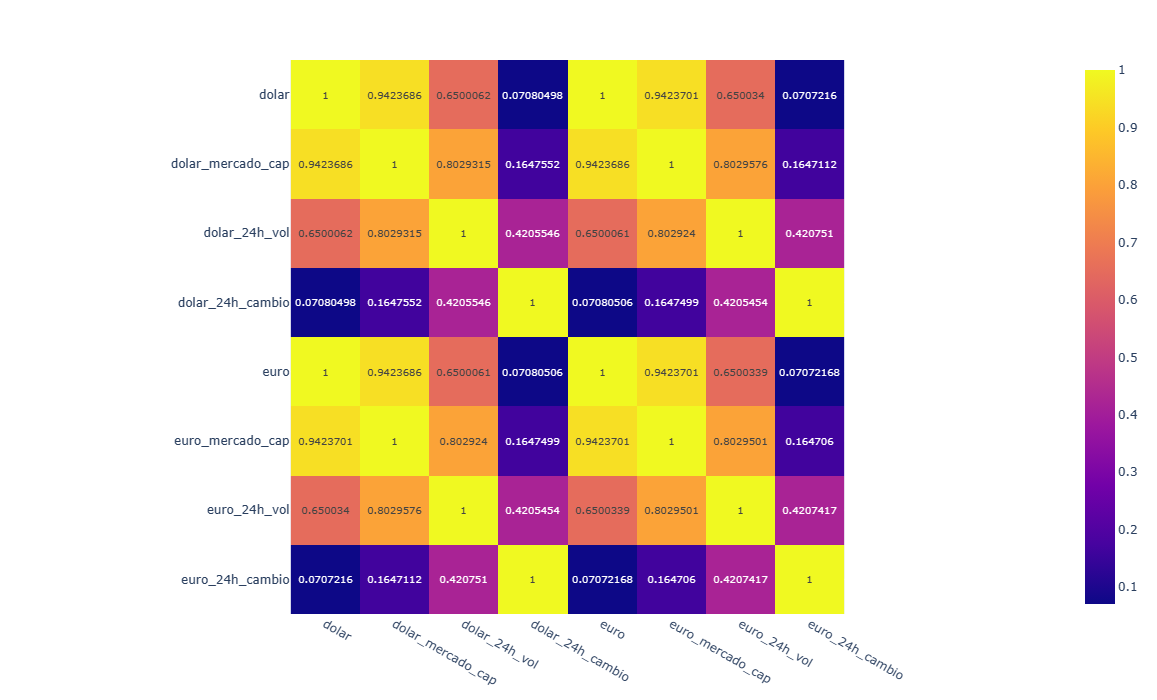

In [17]:
# Mapa de calor para ver las posibles correlaciones
import plotly.express as px

df = df_precio_10_monedas[['dolar', 'dolar_mercado_cap', 'dolar_24h_vol',
       'dolar_24h_cambio', 'euro', 'euro_mercado_cap', 'euro_24h_vol',
       'euro_24h_cambio',]].corr()

fig = px.imshow(df, text_auto=True)
fig.update_layout(
    width=900, # ancho en pixeles
    height=700, # altura en pixeles
)
fig.show()

Este gráfico es un heat map que muestra la correlación entre diferentes variables relacionadas con el mercado  de las criptomonedas.  
La correlación es una medida que indica el grado de relación lineal entre dos variables. Puede tomar valores   entre -1 y 1,  
donde -1 significa una relación negativa perfecta, 0(cero) significa que no hay relación y 1(uno) significa una relación positiva perfecta.

In [18]:
# Eliminamos para liberar memoria
del df_precio_10_monedas

### Comienzo Análisis al datasets df_historico_primeras4_monedas

In [19]:
df_historico_primeras4_monedas.head()

,fecha,precio_btc,mercado_cap_btc,total_volumen_btc,precio_ethereum,mercado_cap_ethereum,total_volumen_ethereum,precio_tether,mercado_cap_tether,total_volumen_tether,precio_binance,mercado_caps_binance,total_volumen_binance
0,2020-07-31,11325.551527,2.089338e+11,2.232980e+10,346.003506,3.879488e+10,1.163842e+10,0.999826,1.077849e+10,2.767305e+10,20.693956,3.060607e+09,2.369806e+08
1,2020-08-01,11812.094307,2.177414e+11,2.619895e+10,387.942421,4.341167e+10,1.537952e+10,1.000382,1.094125e+10,3.510386e+10,21.602046,3.199993e+09,2.772654e+08
2,2020-08-02,11066.306241,2.041261e+11,2.758459e+10,370.732302,4.146994e+10,1.520290e+10,0.999685,1.106235e+10,4.013937e+10,20.907935,3.086470e+09,3.154515e+08
3,2020-08-03,11230.907763,2.072185e+11,2.058334e+10,386.247448,4.327238e+10,1.117415e+10,0.999691,1.111863e+10,2.894188e+10,21.955920,3.239321e+09,2.794168e+08
4,2020-08-04,11181.917508,2.065835e+11,2.052719e+10,389.383008,4.378728e+10,1.211399e+10,0.999923,1.118221e+10,2.876236e+10,22.262852,3.293276e+09,2.460284e+08


In [20]:
print_df_info(df_historico_primeras4_monedas)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1095 non-null   object 
 1   precio_btc              1095 non-null   float64
 2   mercado_cap_btc         1095 non-null   float64
 3   total_volumen_btc       1095 non-null   float64
 4   precio_ethereum         1095 non-null   float64
 5   mercado_cap_ethereum    1095 non-null   float64
 6   total_volumen_ethereum  1095 non-null   float64
 7   precio_tether           1095 non-null   float64
 8   mercado_cap_tether      1095 non-null   float64
 9    total_volumen_tether   1095 non-null   float64
 10  precio_binance          1095 non-null   float64
 11  mercado_caps_binance    1095 non-null   float64
 12  total_volumen_binance   1095 non-null   float64
dtypes: float64(12), object(1)
memory usage: 111.3+ KB
None
** Sh

In [21]:
# Transformar de object a date
df_historico_primeras4_monedas["fecha"] = pd.to_datetime(df_historico_primeras4_monedas["fecha"], format="%Y-%m-%d")

In [22]:
# Comprobar el cambio
df_historico_primeras4_monedas.dtypes

fecha                     datetime64[ns]
precio_btc                       float64
mercado_cap_btc                  float64
total_volumen_btc                float64
precio_ethereum                  float64
mercado_cap_ethereum             float64
total_volumen_ethereum           float64
precio_tether                    float64
mercado_cap_tether               float64
 total_volumen_tether            float64
precio_binance                   float64
mercado_caps_binance             float64
total_volumen_binance            float64
dtype: object

In [23]:
# crear dataframes por año para comparar y ver la evolución en el tiempo del precio
# variable para escoger los años
fecha_anual = ["2020-07-31", "2021-07-31", "2022-07-31", "2023-07-30"]

# dataframe comparar precios
df_precio_hist = df_historico_primeras4_monedas[df_historico_primeras4_monedas["fecha"].isin(fecha_anual)].drop(['mercado_cap_btc', 'total_volumen_btc', 'mercado_cap_ethereum', 'total_volumen_ethereum', 'mercado_cap_tether', ' total_volumen_tether', 'mercado_caps_binance', 'total_volumen_binance'], axis=1).reset_index(drop=True)

# dataframe capitalización de mercados
df_mercado_caps_hist = df_historico_primeras4_monedas[df_historico_primeras4_monedas["fecha"].isin(fecha_anual)].drop(['precio_btc', 'total_volumen_btc', 'precio_ethereum', 'total_volumen_ethereum', 'precio_tether', ' total_volumen_tether',
'precio_binance', 'total_volumen_binance'], axis=1).reset_index(drop=True)

# dataframe volúmen total de transacciones
df_total_volumen_hist = df_historico_primeras4_monedas[df_historico_primeras4_monedas["fecha"].isin(fecha_anual)].drop(['precio_btc', 'mercado_cap_btc', 'precio_ethereum', 'mercado_cap_ethereum', 'precio_tether', 'mercado_cap_tether', 'precio_binance', 'mercado_caps_binance'], axis=1).reset_index(drop=True)


# renombrar columna date
df_precio_hist = df_precio_hist.rename(columns={'fecha':'año'})
df_mercado_caps_hist = df_mercado_caps_hist.rename(columns={'fecha':'año'})
df_total_volumen_hist = df_total_volumen_hist.rename(columns={'fecha':'año'})

# extraer el año
df_precio_hist["año"] = df_precio_hist["año"].dt.year
df_mercado_caps_hist["año"] = df_mercado_caps_hist["año"].dt.year
df_total_volumen_hist["año"] = df_total_volumen_hist["año"].dt.year

In [24]:
# visualizar
df_precio_hist

,año,precio_btc,precio_ethereum,precio_tether,precio_binance
0,2020,11325.551527,346.003506,0.999826,20.693956
1,2021,41754.166604,2541.674599,1.000153,334.985029
2,2022,23379.700525,1682.011374,1.001284,283.915407
3,2023,29277.755810,1861.869910,1.000238,242.540332


In [25]:
# Crear gráfico comparar precios últimos 3 años
fig = px.line(df_precio_hist, x='año', y=['precio_btc', 'precio_ethereum', 'precio_tether', 'precio_binance'], line_shape='linear')
fig.update_layout(
    title='Histórico de Precios 4 Primeras Criptomonedas - 2020-2023', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**El precio de las criptomonedas ha aumentado en general en los últimos 3 años.**  
- Bitcoin ha sido la criptomoneda más cara y con mayor variación de precio, alcanzando un máximo de alrededor de 40000 dólares en 2021 y un mínimo de alrededor de 5000 dólares en 2020.

In [26]:
# Crear gráfico comparar capitalización de mercado últimos 3 años
fig = px.line(df_mercado_caps_hist, x='año', y=["mercado_cap_btc", "mercado_cap_ethereum", "mercado_cap_tether", "mercado_caps_binance"], line_shape='linear')
fig.update_layout(
    title='Histórico de Cap. Mercado 4 Primeras Criptomonedas - 2020-2023', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Cantidad')
fig.show(renderer="iframe")

**Notamos como bitcoin mantiene su dominancia en la capitalizaciób del mercado**  
- Podemos observar propuestas como Ethereum que también tienen presencia importante en la  
capitalización de mercado

In [27]:
# Crear gráfico comparar total volúmen transacciones últimos 3 años
fig = px.line(df_total_volumen_hist, x='año', y=["total_volumen_btc", "total_volumen_ethereum", " total_volumen_tether",  "total_volumen_binance"], line_shape='linear')
fig.update_layout(
    title="Histórico de Volúmen Transacciones 4 Primeras Criptomonedas - 2020-2023", 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Volúmen')
fig.show(renderer="iframe")

**Se espera una posible disminución del volumen de transacciones para las cuatro criptomonedas en 2023.**

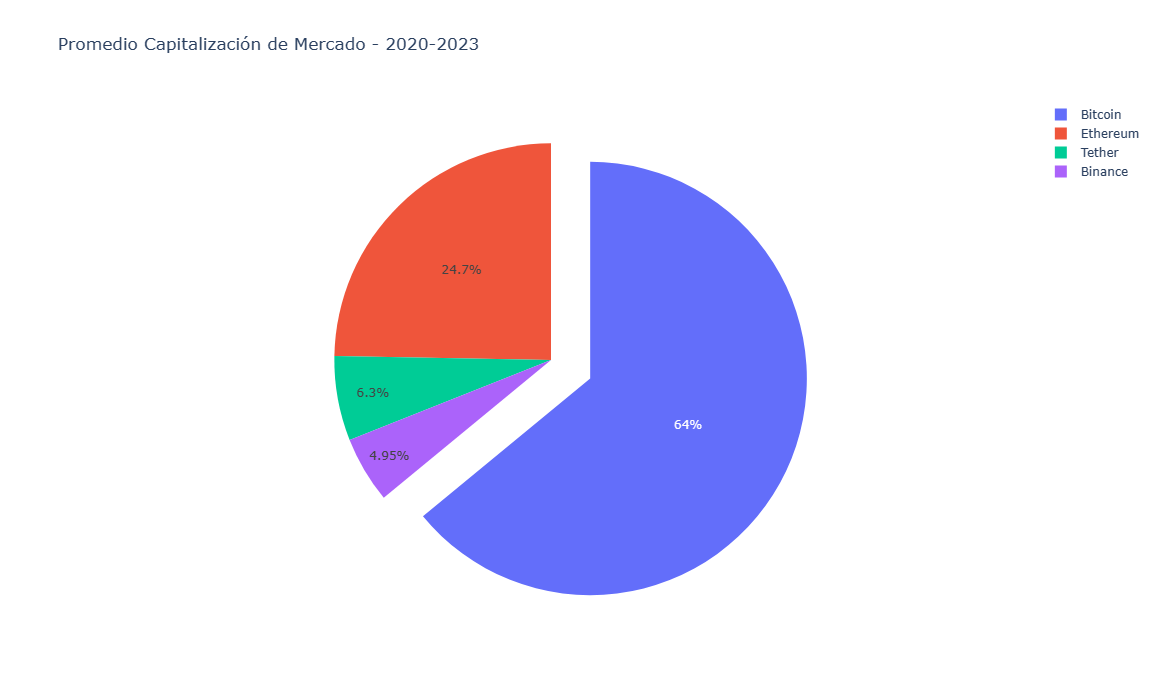

In [28]:
# Gráfico Promedio Histórico Capitalización de Mercado 4 Primeras Monedas
promedio_historico_btc = df_historico_primeras4_monedas['mercado_cap_btc'].mean()
promedio_historico_ethereum = df_historico_primeras4_monedas['mercado_cap_ethereum'].mean()
promedio_historico_tether = df_historico_primeras4_monedas['mercado_cap_tether'].mean()
promedio_historico_binance = df_historico_primeras4_monedas['mercado_caps_binance'].mean()

labels = ['Bitcoin','Ethereum','Tether','Binance']
values = [promedio_historico_btc, promedio_historico_ethereum, promedio_historico_tether, promedio_historico_binance]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0, 0, 0])])
fig.update_layout(
    title="Promedio Capitalización de Mercado - 2020-2023",
    width=700, # ancho en pixeles
    height=700, # altura en pixeles
)

fig.show()

**Presencia del mercado importante de Bitcoin**

### Comienzo Análisis Datasets OLHC(Open, Low, High, Close)

In [29]:
df_olhc_btc.head()
df_olhc_ethereum.head()
df_olhc_tether.head()
df_olhc_binance.head()

,fecha,precio_apertura_binance,precio_maximo_binance,precio_minimo_binance,precio_cierre_binance
0,2023-02-26,308.57,308.57,308.57,308.57
1,2023-02-27,304.56,304.56,299.82,299.82
2,2023-03-06,290.22,290.22,288.02,288.02
3,2023-03-10,289.25,289.25,277.03,277.03
4,2023-03-14,275.74,309.58,275.74,309.58


In [32]:
# Gráfico OLHC(Open, Low, High, Close) para Bitcoin desde Marzo 2023
fig = px.line(df_olhc_btc, x='fecha', y=["precio_apertura_btc", "precio_maximo_btc", "precio_minimo_btc", "precio_cierre_btc"], line_shape='linear')
fig.update_layout(
    title='OLHC de Bitcoin', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**En general los precios se mantienen cerca entre ellos**  
Aunque muestra una disminución general en el precio de Bitcoin a lo largo del período de tiempo,  
con algunas fluctuaciones.

In [31]:
# Gráfico OLHC(Open, Low, High, Close) para Ethereum desde Marzo 2023
fig = px.line(df_olhc_ethereum, x='fecha', y=["precio_apertura_ethereum", "precio_maximo_ethereum", "precio_minimo_ethereum", "precio_cierre_ethereum"], line_shape='linear')
fig.update_layout(
    title='OLHC de Ethereum', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**Sucede igual con Ethereum**  
Pero mas irregular, mostrando fluctuaciones en el precio a lo largo del tiempo.

In [34]:
# Gráfico OLHC(Open, Low, High, Close) para Tether desde Marzo 2023
fig = px.line(df_olhc_tether, x='fecha', y=["precio_apertura_tether", "precio_maximo_tether", "precio_minimo_tether", "precio_cierre_tether"], line_shape='linear')
fig.update_layout(
    title='OLHC de Tether', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**Comienzo del año a la alza**  
Para luego estabilizarse, se observa irregular pero dentro de un rango

In [35]:
# Gráfico OLHC(Open, Low, High, Close) para Binance desde Marzo 2023
fig = px.line(df_olhc_binance, x='fecha', y=['precio_apertura_binance', 'precio_cierre_binance', 'precio_maximo_binance', 'precio_minimo_binance'], line_shape='linear')
fig.update_layout(
    title='OLHC de Binance', 
    xaxis = dict(
        showgrid=True
    ), 
    yaxis = dict(
        showgrid=True
    ),  
    paper_bgcolor='#FFFFFF'
)
fig.update_yaxes(title_text='Precio')
fig.show(renderer="iframe")

**Muy Irregular**
Irregular, tendencia a la baja, no siguen un patrón.